In [1]:
# Plot dependence of summary statistics on s
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from LRT_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR='/storage/BonnieH/selection_project/figures/figures/summ_stats/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function to plot figure
def plot_figure(fig_num, per, opt_alleles_list, y_pos, objects, suffix, mean, std, fig_type, model):

    if model == 'eurodem_merge':
        model_name = 'European demographic model: 56k generations'
    if model == '20k_merge':
        model_name = '20k generations'
    if model == '50k_merge':
        model_name = '50k generations'
        
    title_dic = {}
    title_dic['het'] = 'Heterozygosity'
    title_dic['common'] = 'Number common alleles'
    
    plt.figure(fig_num)
    
    title = ''
    filename = ''
    error = ''
    y_label = "Mean " + title_dic[suffix]
    
    if fig_type == 1:
        
        plt.errorbar(y_pos, mean, yerr=std, marker = 'o')
        error = 'Standard deviation'
    
    if fig_type == 2:
        
        for opt in opt_alleles_list:
            plt.errorbar(y_pos, mean[opt], marker = 'o', label = '(%d %d)'%(per, opt))
        opt_alleles_list = ''.join(str(item) for item in opt_alleles_list)
        plt.legend()
        
    plt.xticks(y_pos, objects)
    plt.xticks(rotation=70)
    plt.xlabel("S value")
    plt.ylabel(y_label)
    
    if fig_type == 2:
        plt.title("%s v. s \n Model: %s"%(title_dic[suffix], model_name))
        plt.savefig('%s%s_per_%d_opt_%s_%s.pdf'%(PLOTDIR, suffix, per, opt_alleles_list, model), bbox_inches='tight')
    
    else:
        plt.title("%s v. s \n Model: %s \n Per=%d; Opt allele=%s \n Error bars = %s"%(title_dic[suffix], model_name, per, opt_alleles_list, error))
        plt.savefig('%sindiv/%s_per_%d_opt_%d_%s.pdf'%(PLOTDIR, suffix, per, opt_alleles_list, model), bbox_inches='tight')

In [3]:
# Graph multiple optimal alleles in same graph
def GraphMult(per, opt_alleles_list, fig_num, model):
    
    suffix_list = ['het', 'common']
    
    svals = [0, 10**-6, 10**-5, 10**-4, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8]
    
    mean_het = {}
    mean_common = {}
    std_het = {}
    std_common = {}
    
    for opt_allele in opt_alleles_list:
        mean_het[opt_allele] = []
        mean_common[opt_allele] = []
        std_het[opt_allele] = []
        std_common[opt_allele] = []
        
        for s in svals:
           
            file_prefix = '/gymreklab-tscc/bonnieh/lrt/results/' + model + '/' + str(per) + '_' + str(opt_allele) 

            list_of_lists = GetAllLRTLists(file_prefix, suffix_list, s)

            het_list = list_of_lists[0]
            mean = np.mean(het_list)
            mean_het[opt_allele].append(mean)
            std = np.std(het_list)
            std_het[opt_allele].append(std)
            
            common_list = list_of_lists[1]
            mean = np.mean(common_list)
            mean_common[opt_allele].append(mean)
            std = np.std(common_list)
            std_common[opt_allele].append(std)
            
    objects = ('0', '10**-6', '10**-5', '10**-4', '0.0004', '0.0007', '0.001', '0.004', '0.007', '0.01', '0.04', '0.07', '0.1', '0.15', '0.2', '0.4', '0.6', '0.8')
    y_pos = np.arange(len(objects))
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_alleles_list, y_pos, objects, 'het', mean_het, std_het, 2, model)
    fig_num = fig_num + 1
    plot_figure(fig_num, per, opt_alleles_list, y_pos, objects, 'common', mean_common, std_common, 2, model)
    
    # Graph heterozygosity of each optimal allele individually
    for opt in opt_alleles_list:
        fig_num = fig_num + 1
        plot_figure(fig_num, per, opt, y_pos, objects, 'het', mean_het[opt], std_het[opt], 1, model)
    return fig_num

In [4]:
def main():
    
    print('Running main')
    
    # Periods and optimal alleles to graph
    pers = [1,2,3,4]
    opt_allele_dic = {}
    opt_allele_dic[1] = np.arange(12,48,4)
    opt_allele_dic[2] = np.arange(11,21,1)
    opt_allele_dic[3] = np.arange(5,13,1)
    opt_allele_dic[4] = np.arange(7,11,1)
    
    # Models to graph
    models = ['20k_merge', '50k_merge', 'eurodem_merge']
    
    # Graphing all optimal alleles for each period on same plot
    fig_num = 0
    for per in pers:
        for model in models:
            opt_alleles = opt_allele_dic[per]
            fig_num = GraphMult(per, opt_alleles, fig_num, model)

Running main


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


CPU times: user 48.3 s, sys: 1.69 s, total: 49.9 s
Wall time: 6min 52s


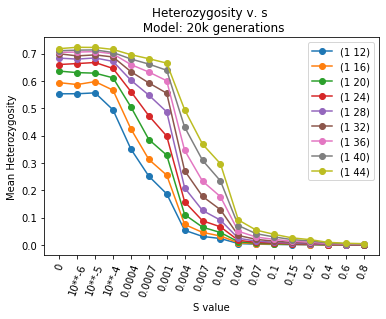

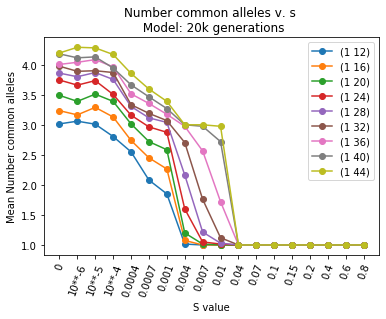

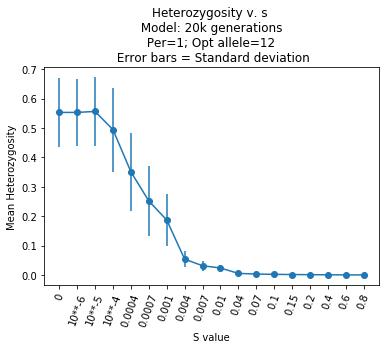

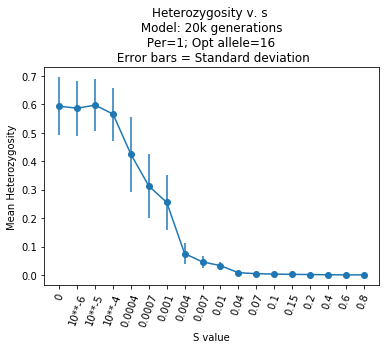

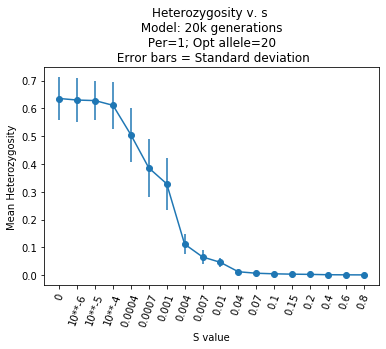

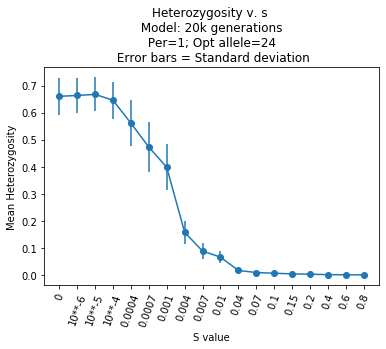

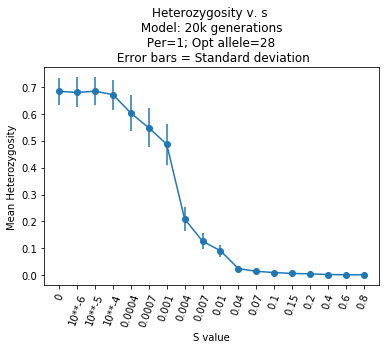

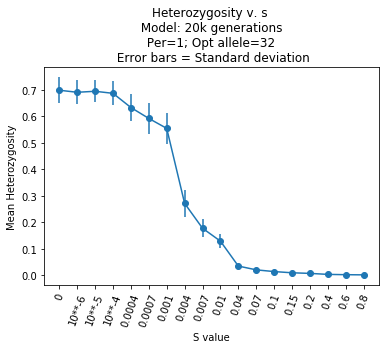

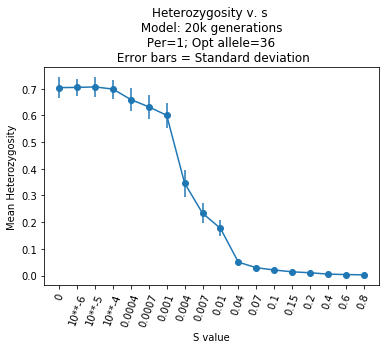

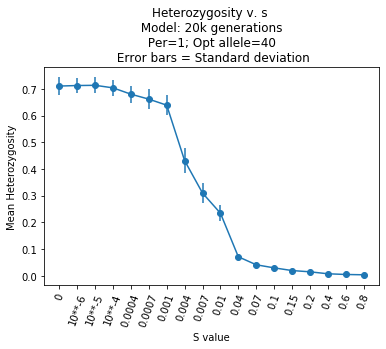

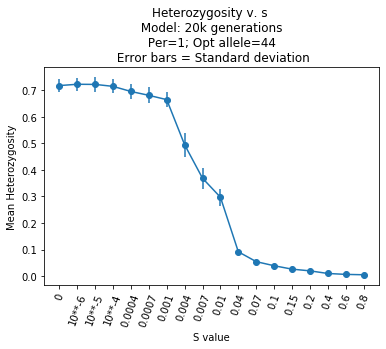

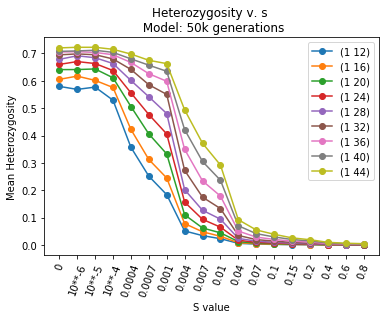

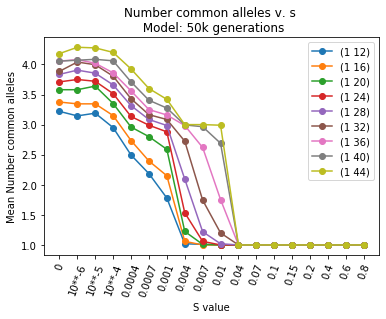

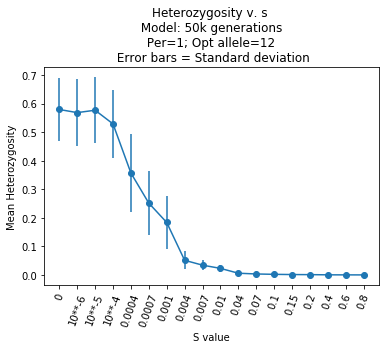

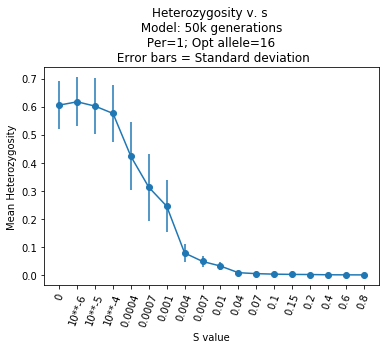

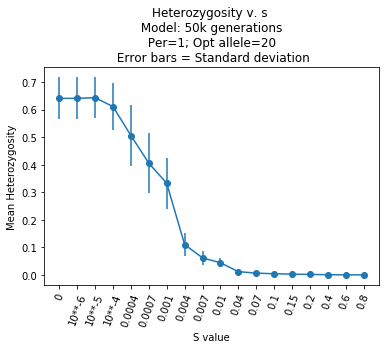

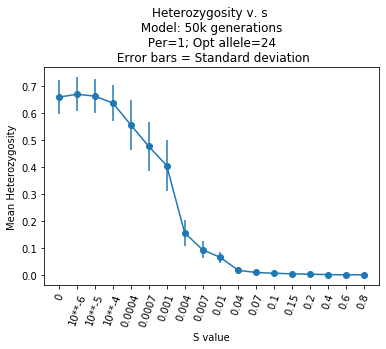

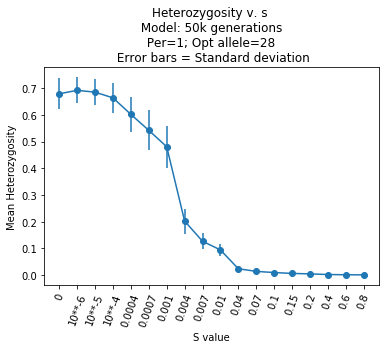

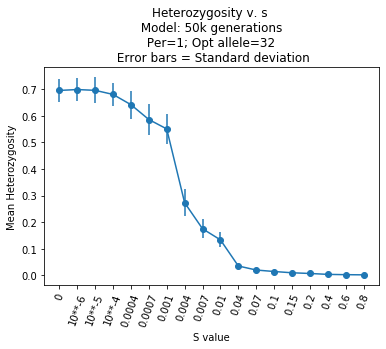

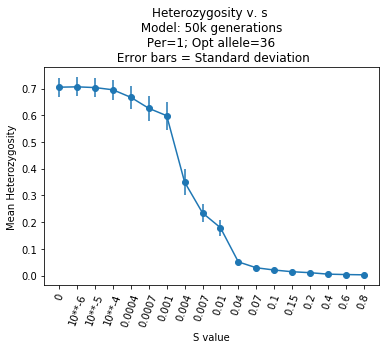

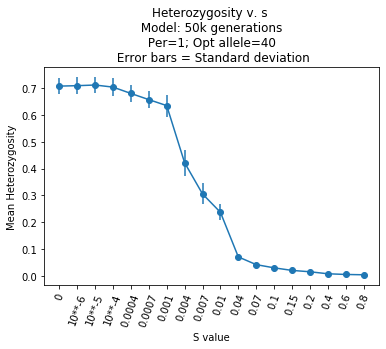

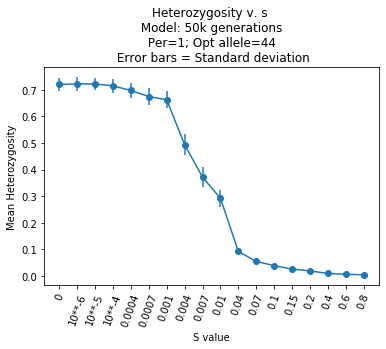

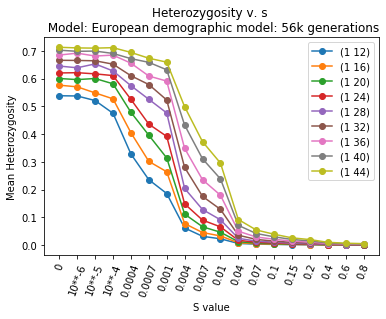

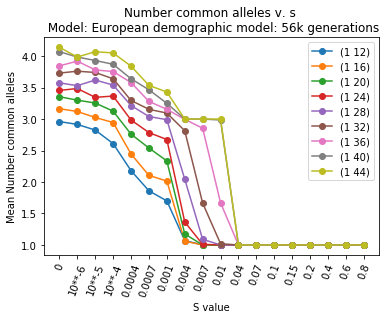

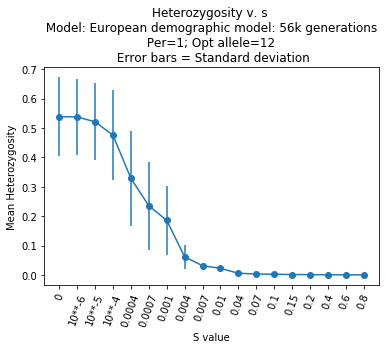

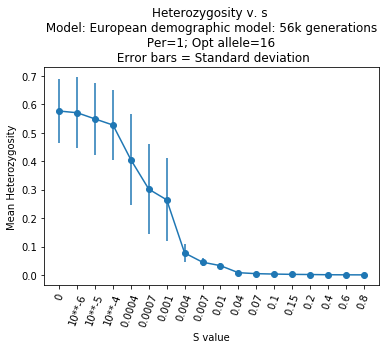

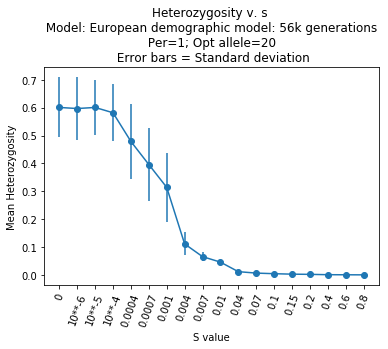

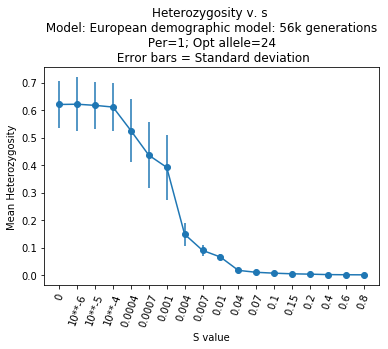

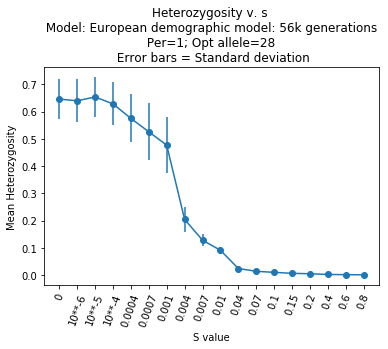

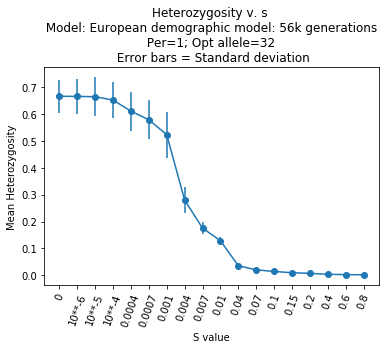

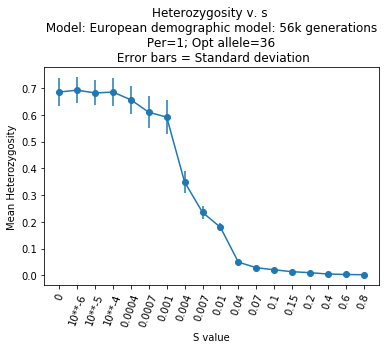

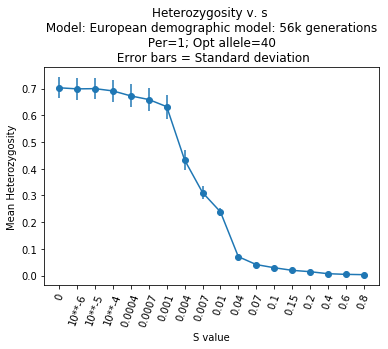

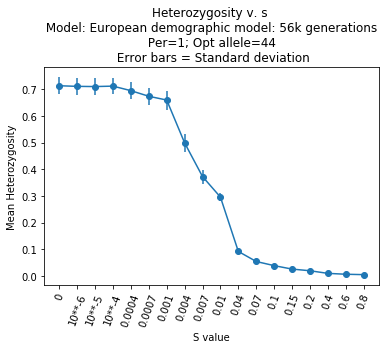

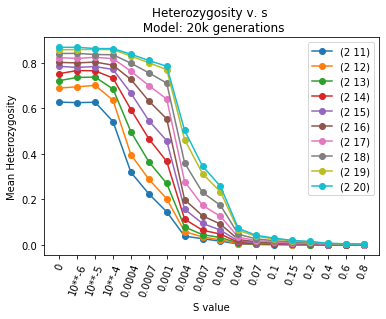

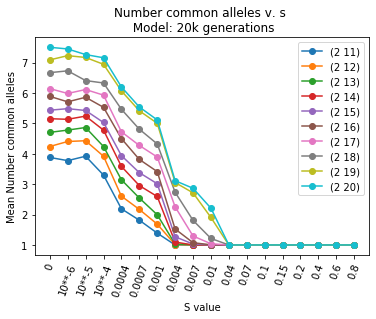

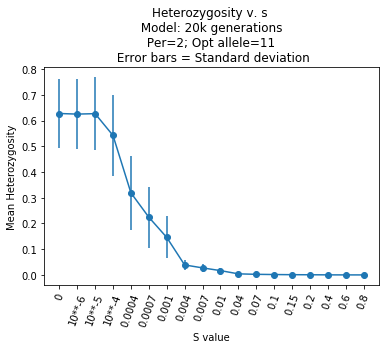

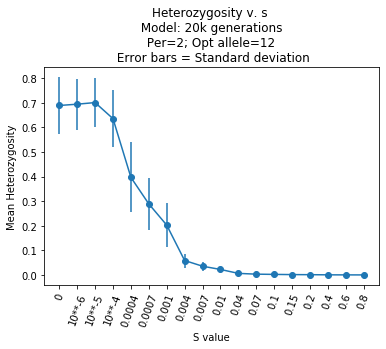

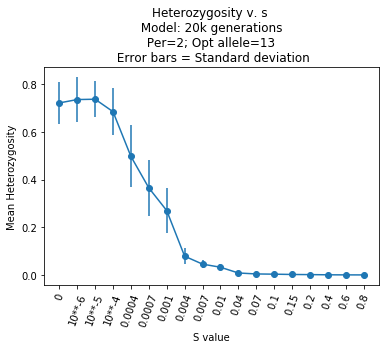

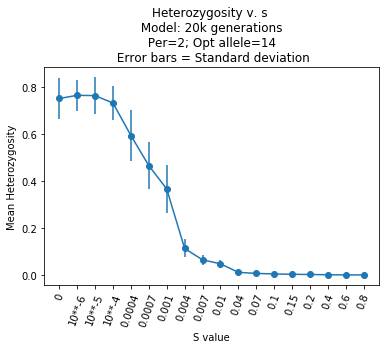

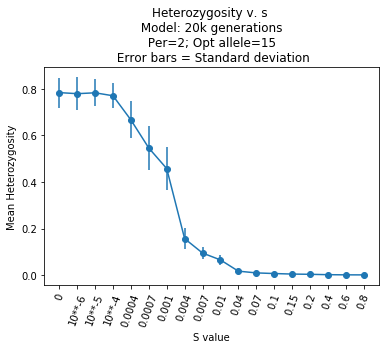

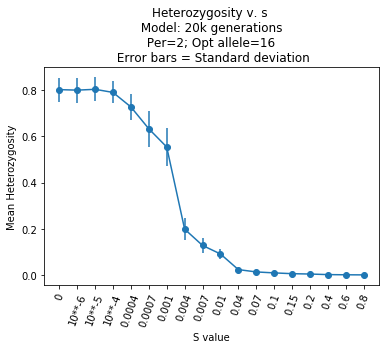

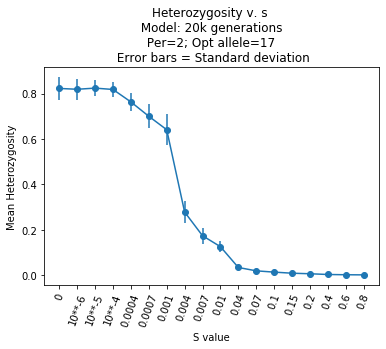

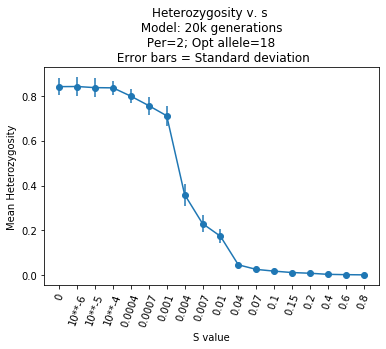

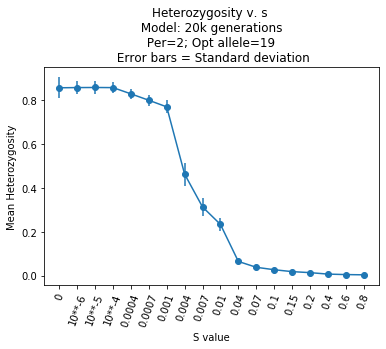

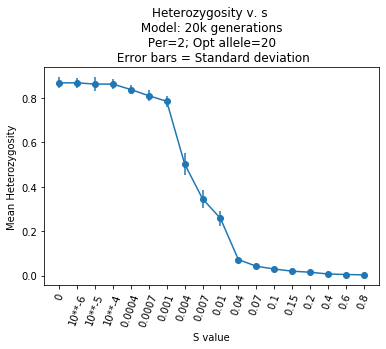

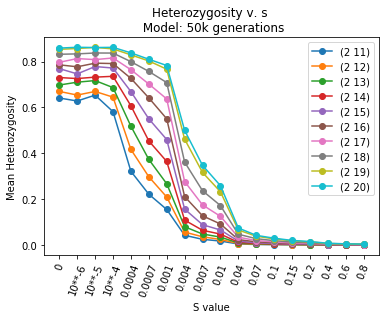

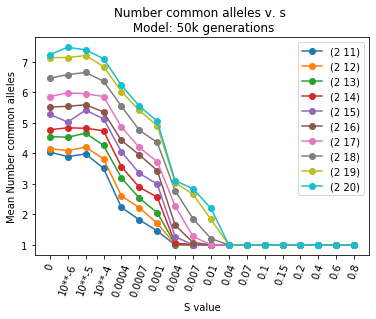

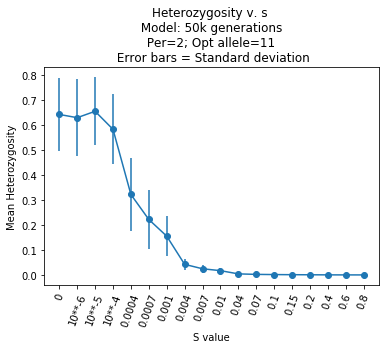

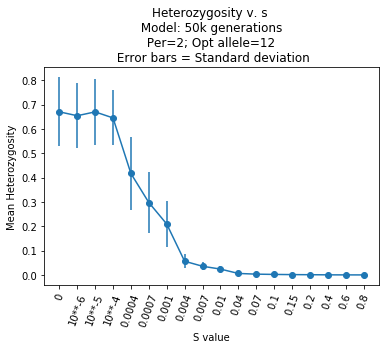

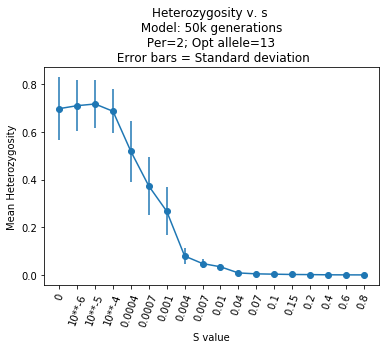

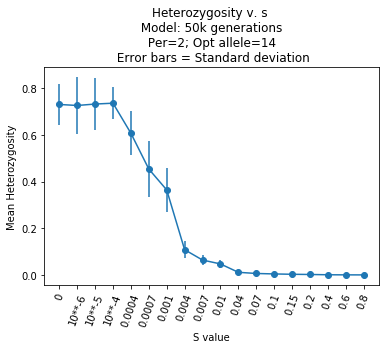

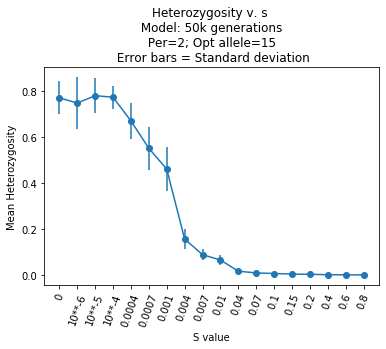

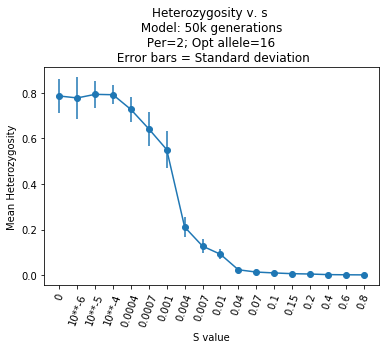

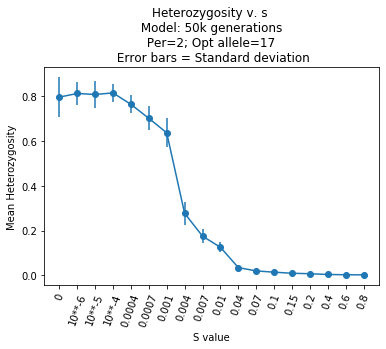

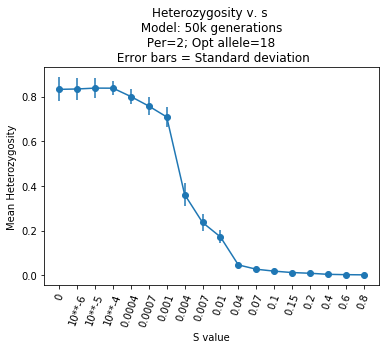

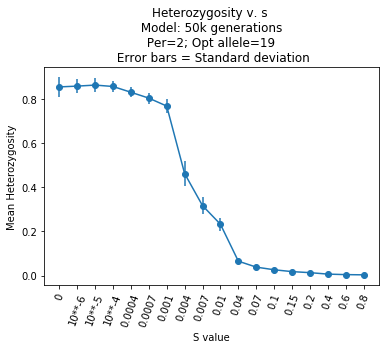

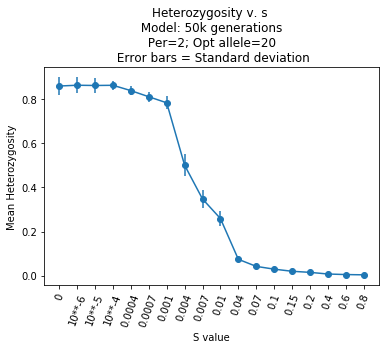

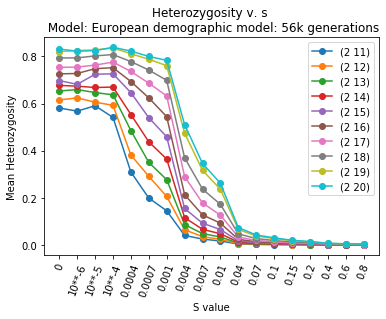

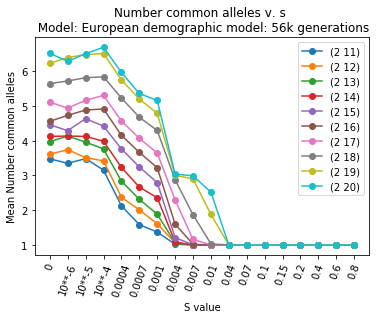

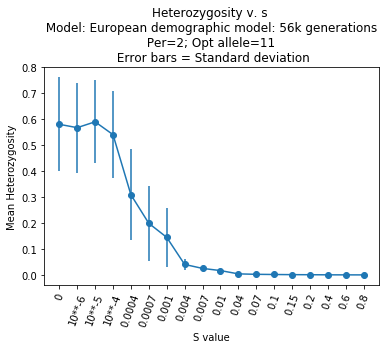

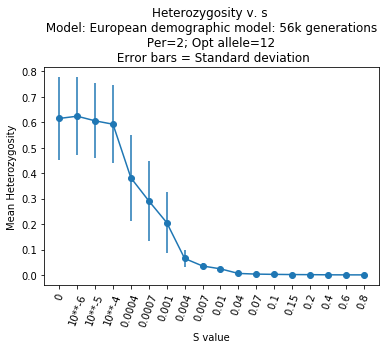

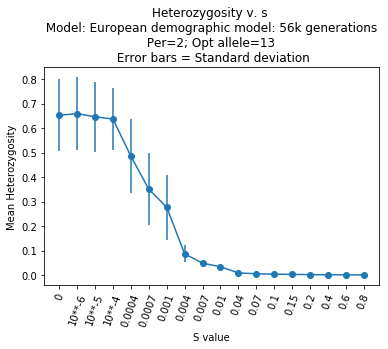

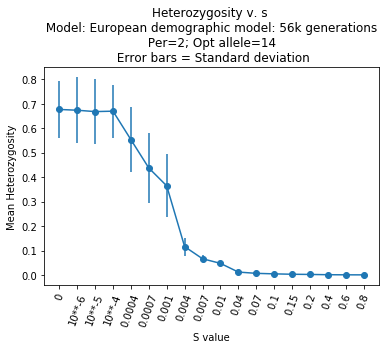

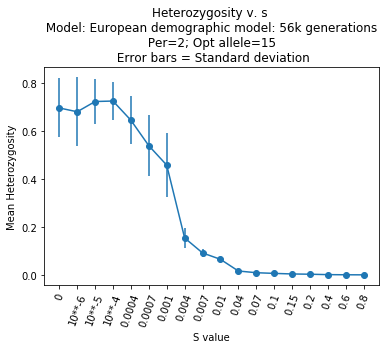

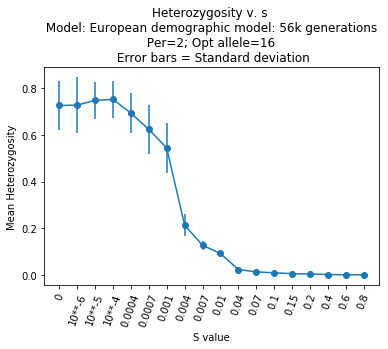

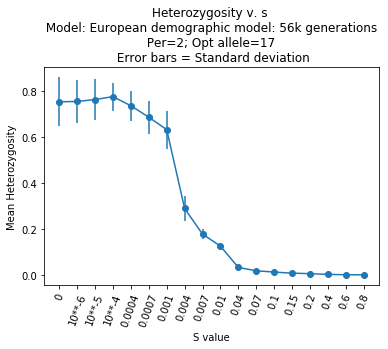

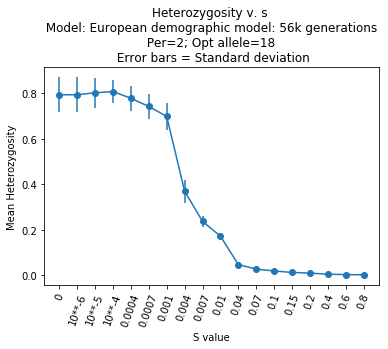

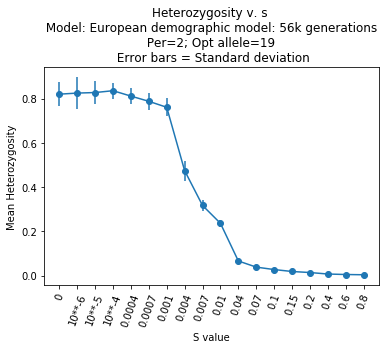

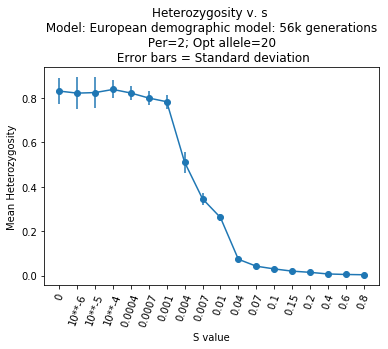

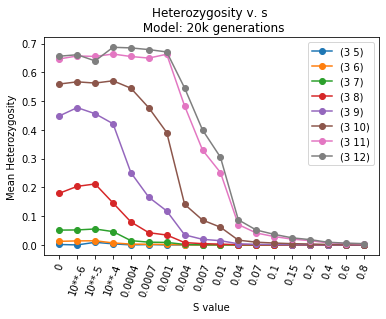

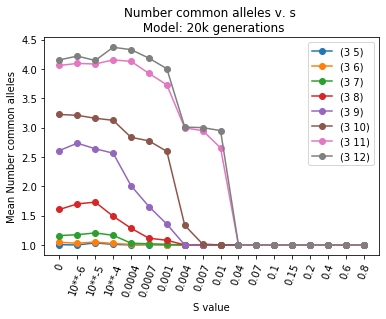

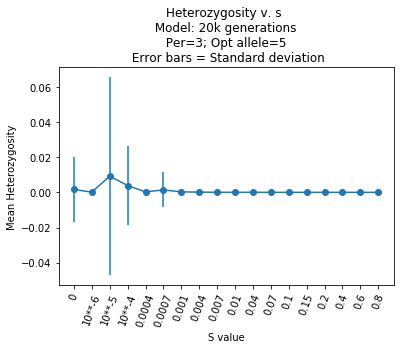

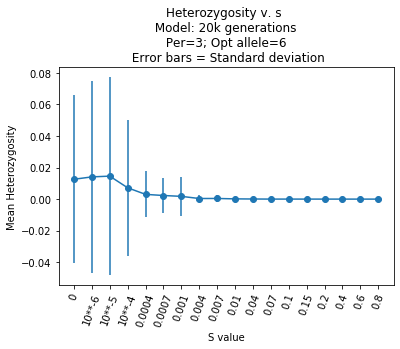

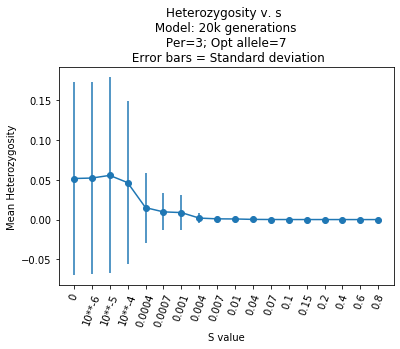

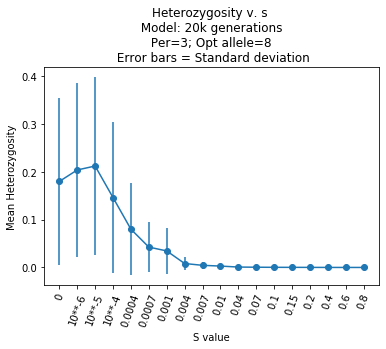

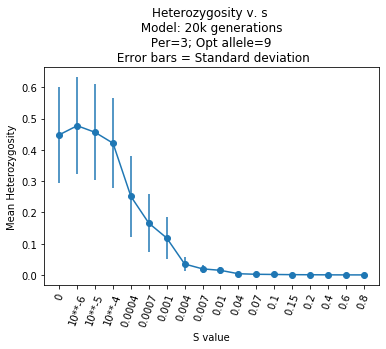

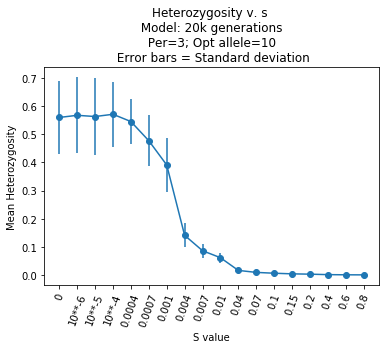

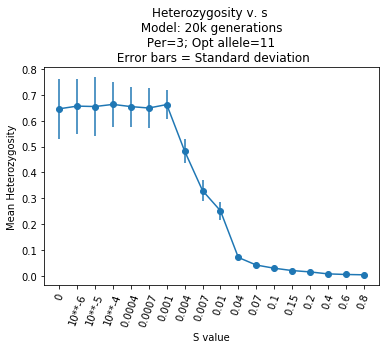

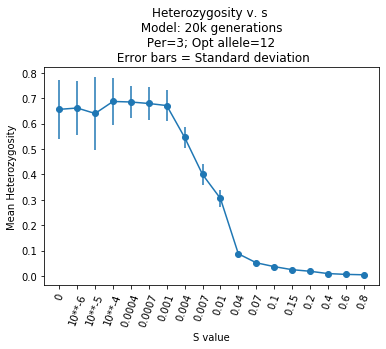

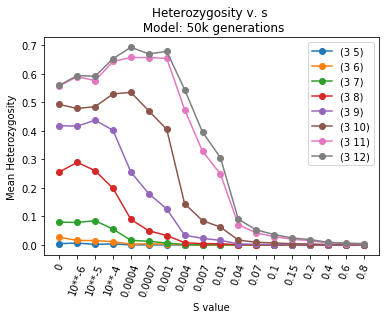

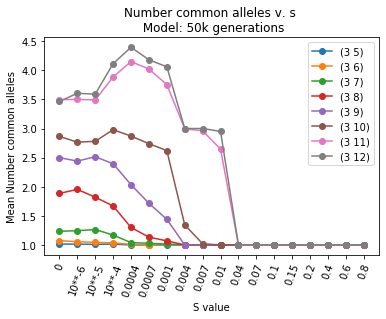

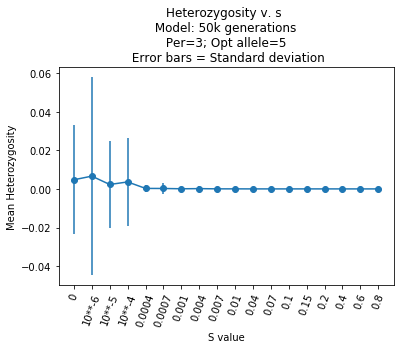

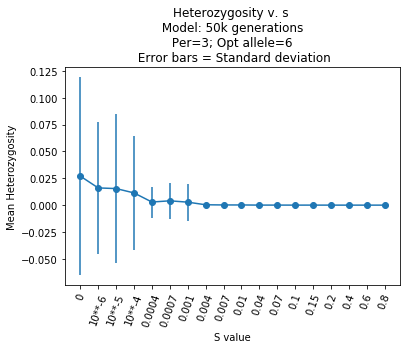

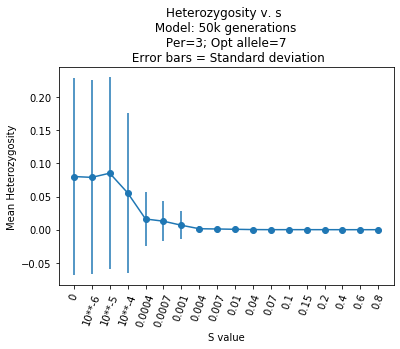

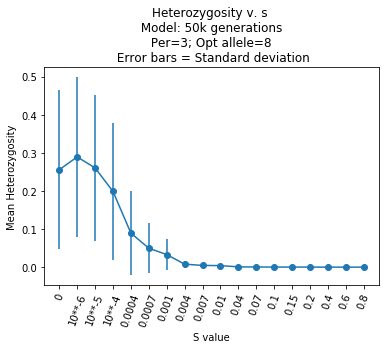

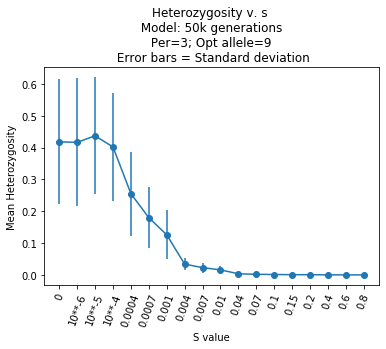

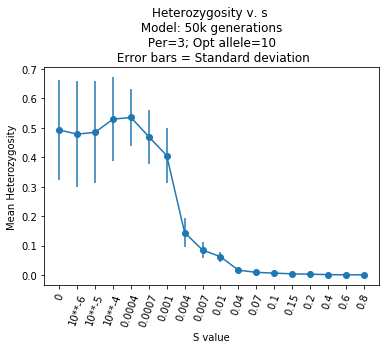

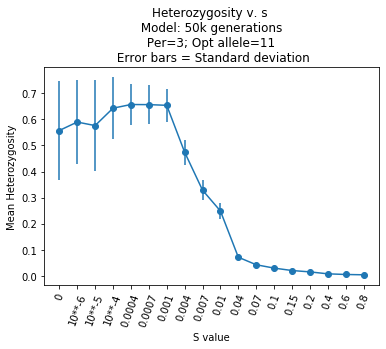

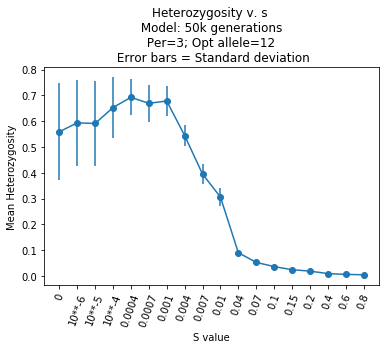

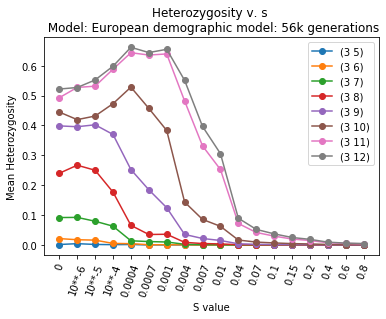

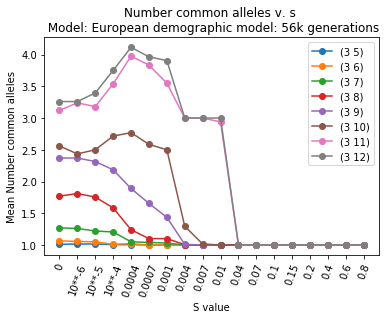

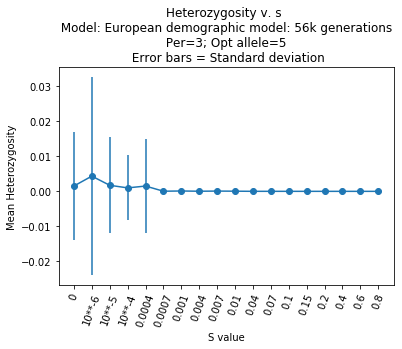

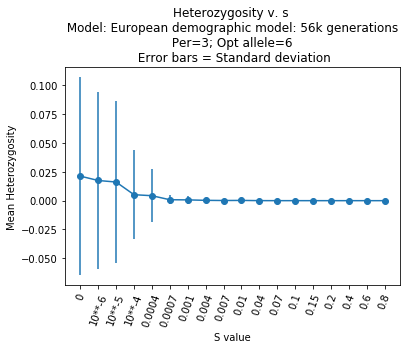

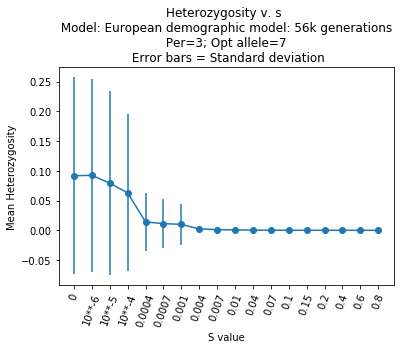

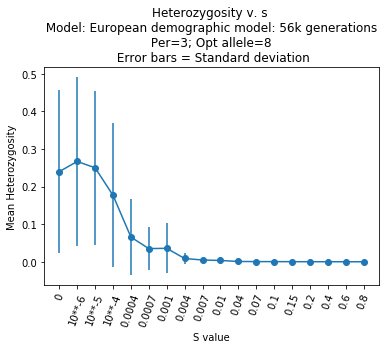

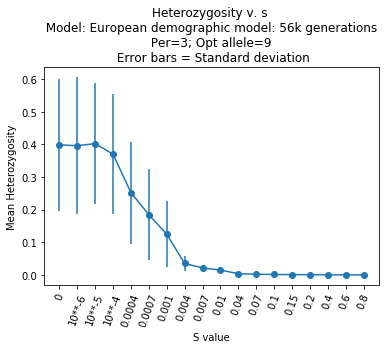

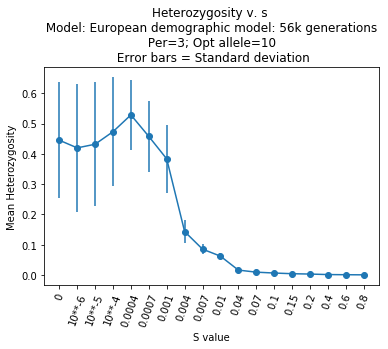

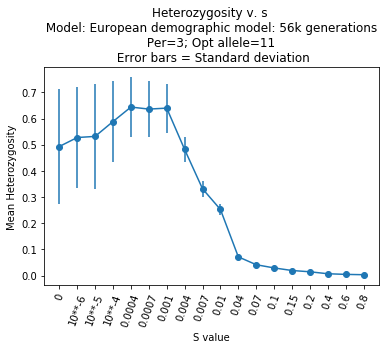

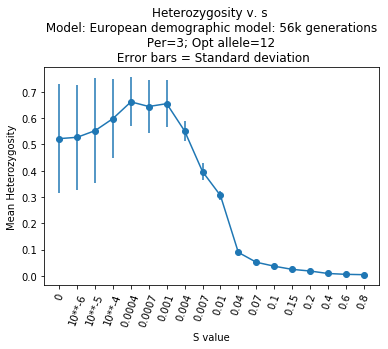

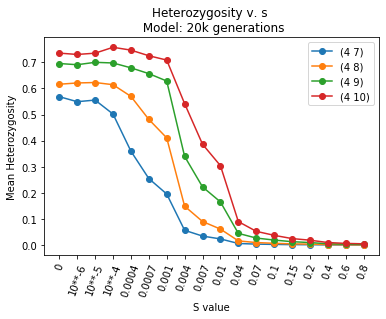

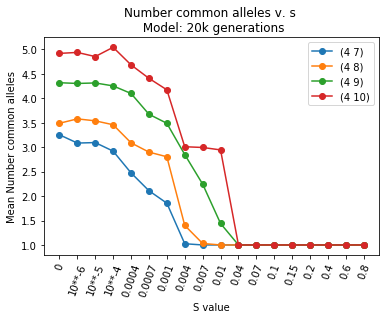

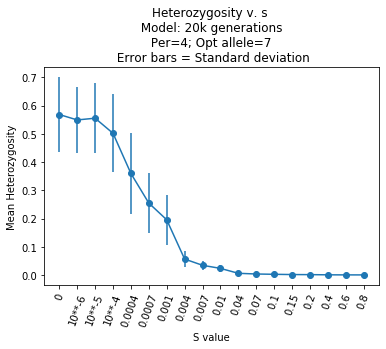

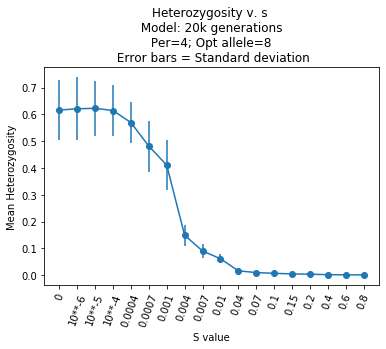

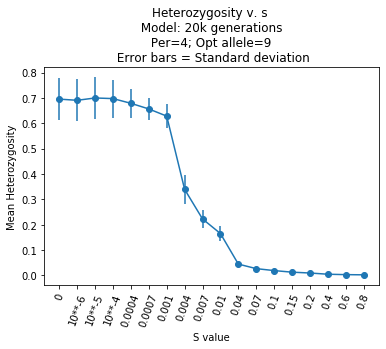

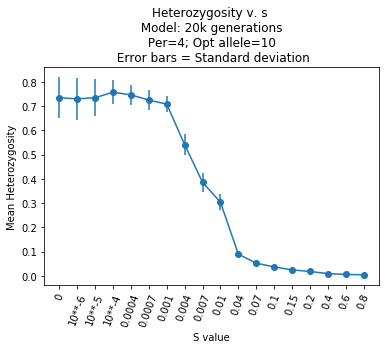

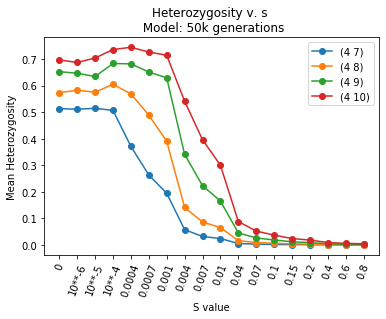

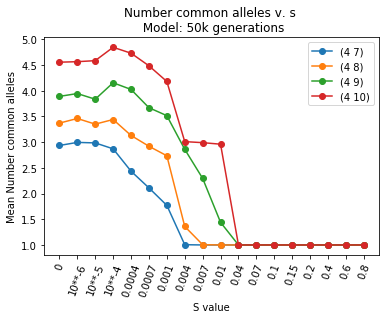

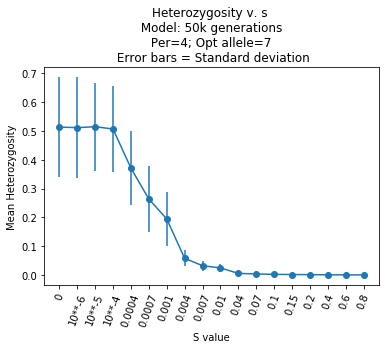

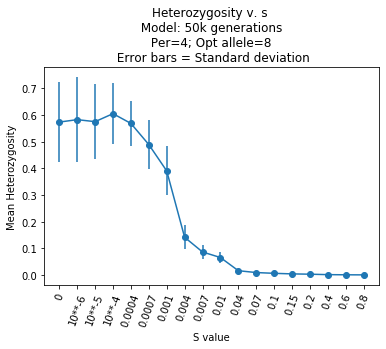

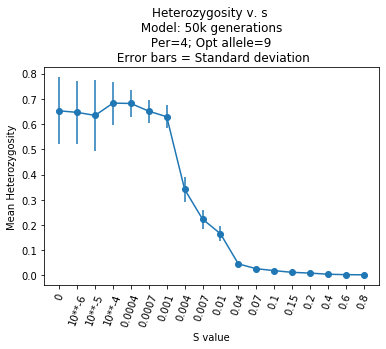

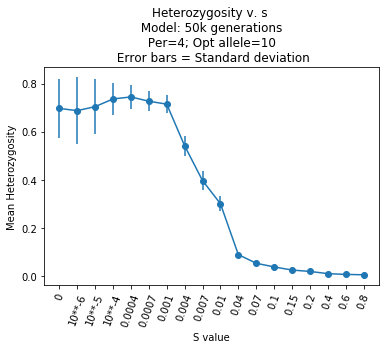

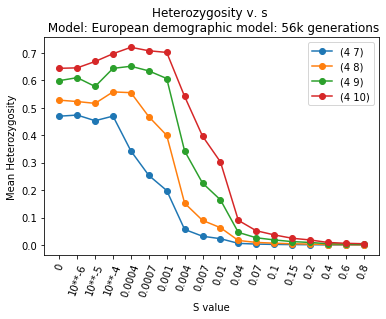

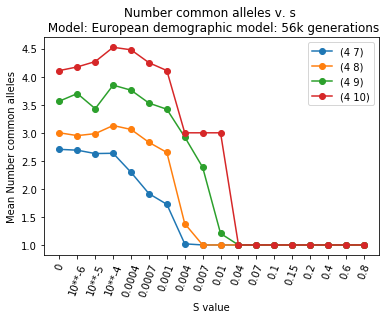

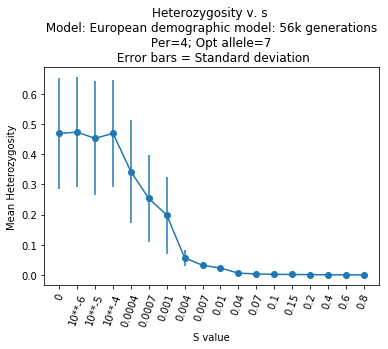

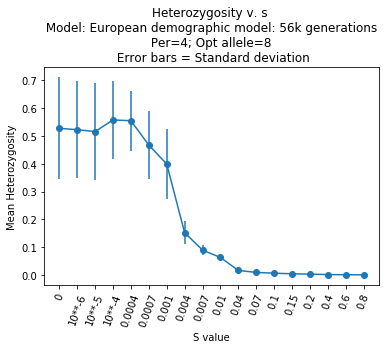

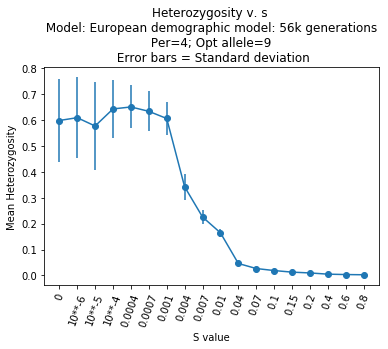

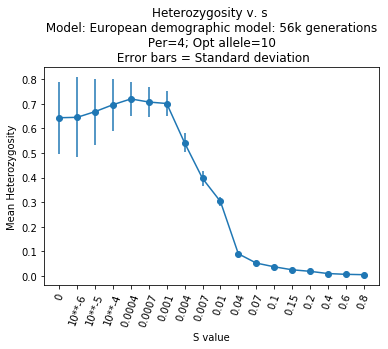

In [5]:
%%time
if __name__ == '__main__':
    main()